In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df = df.select_dtypes(include = ['float64', 'int64']) 
df.copy()
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [7]:
df.corr()     #We looked at the corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


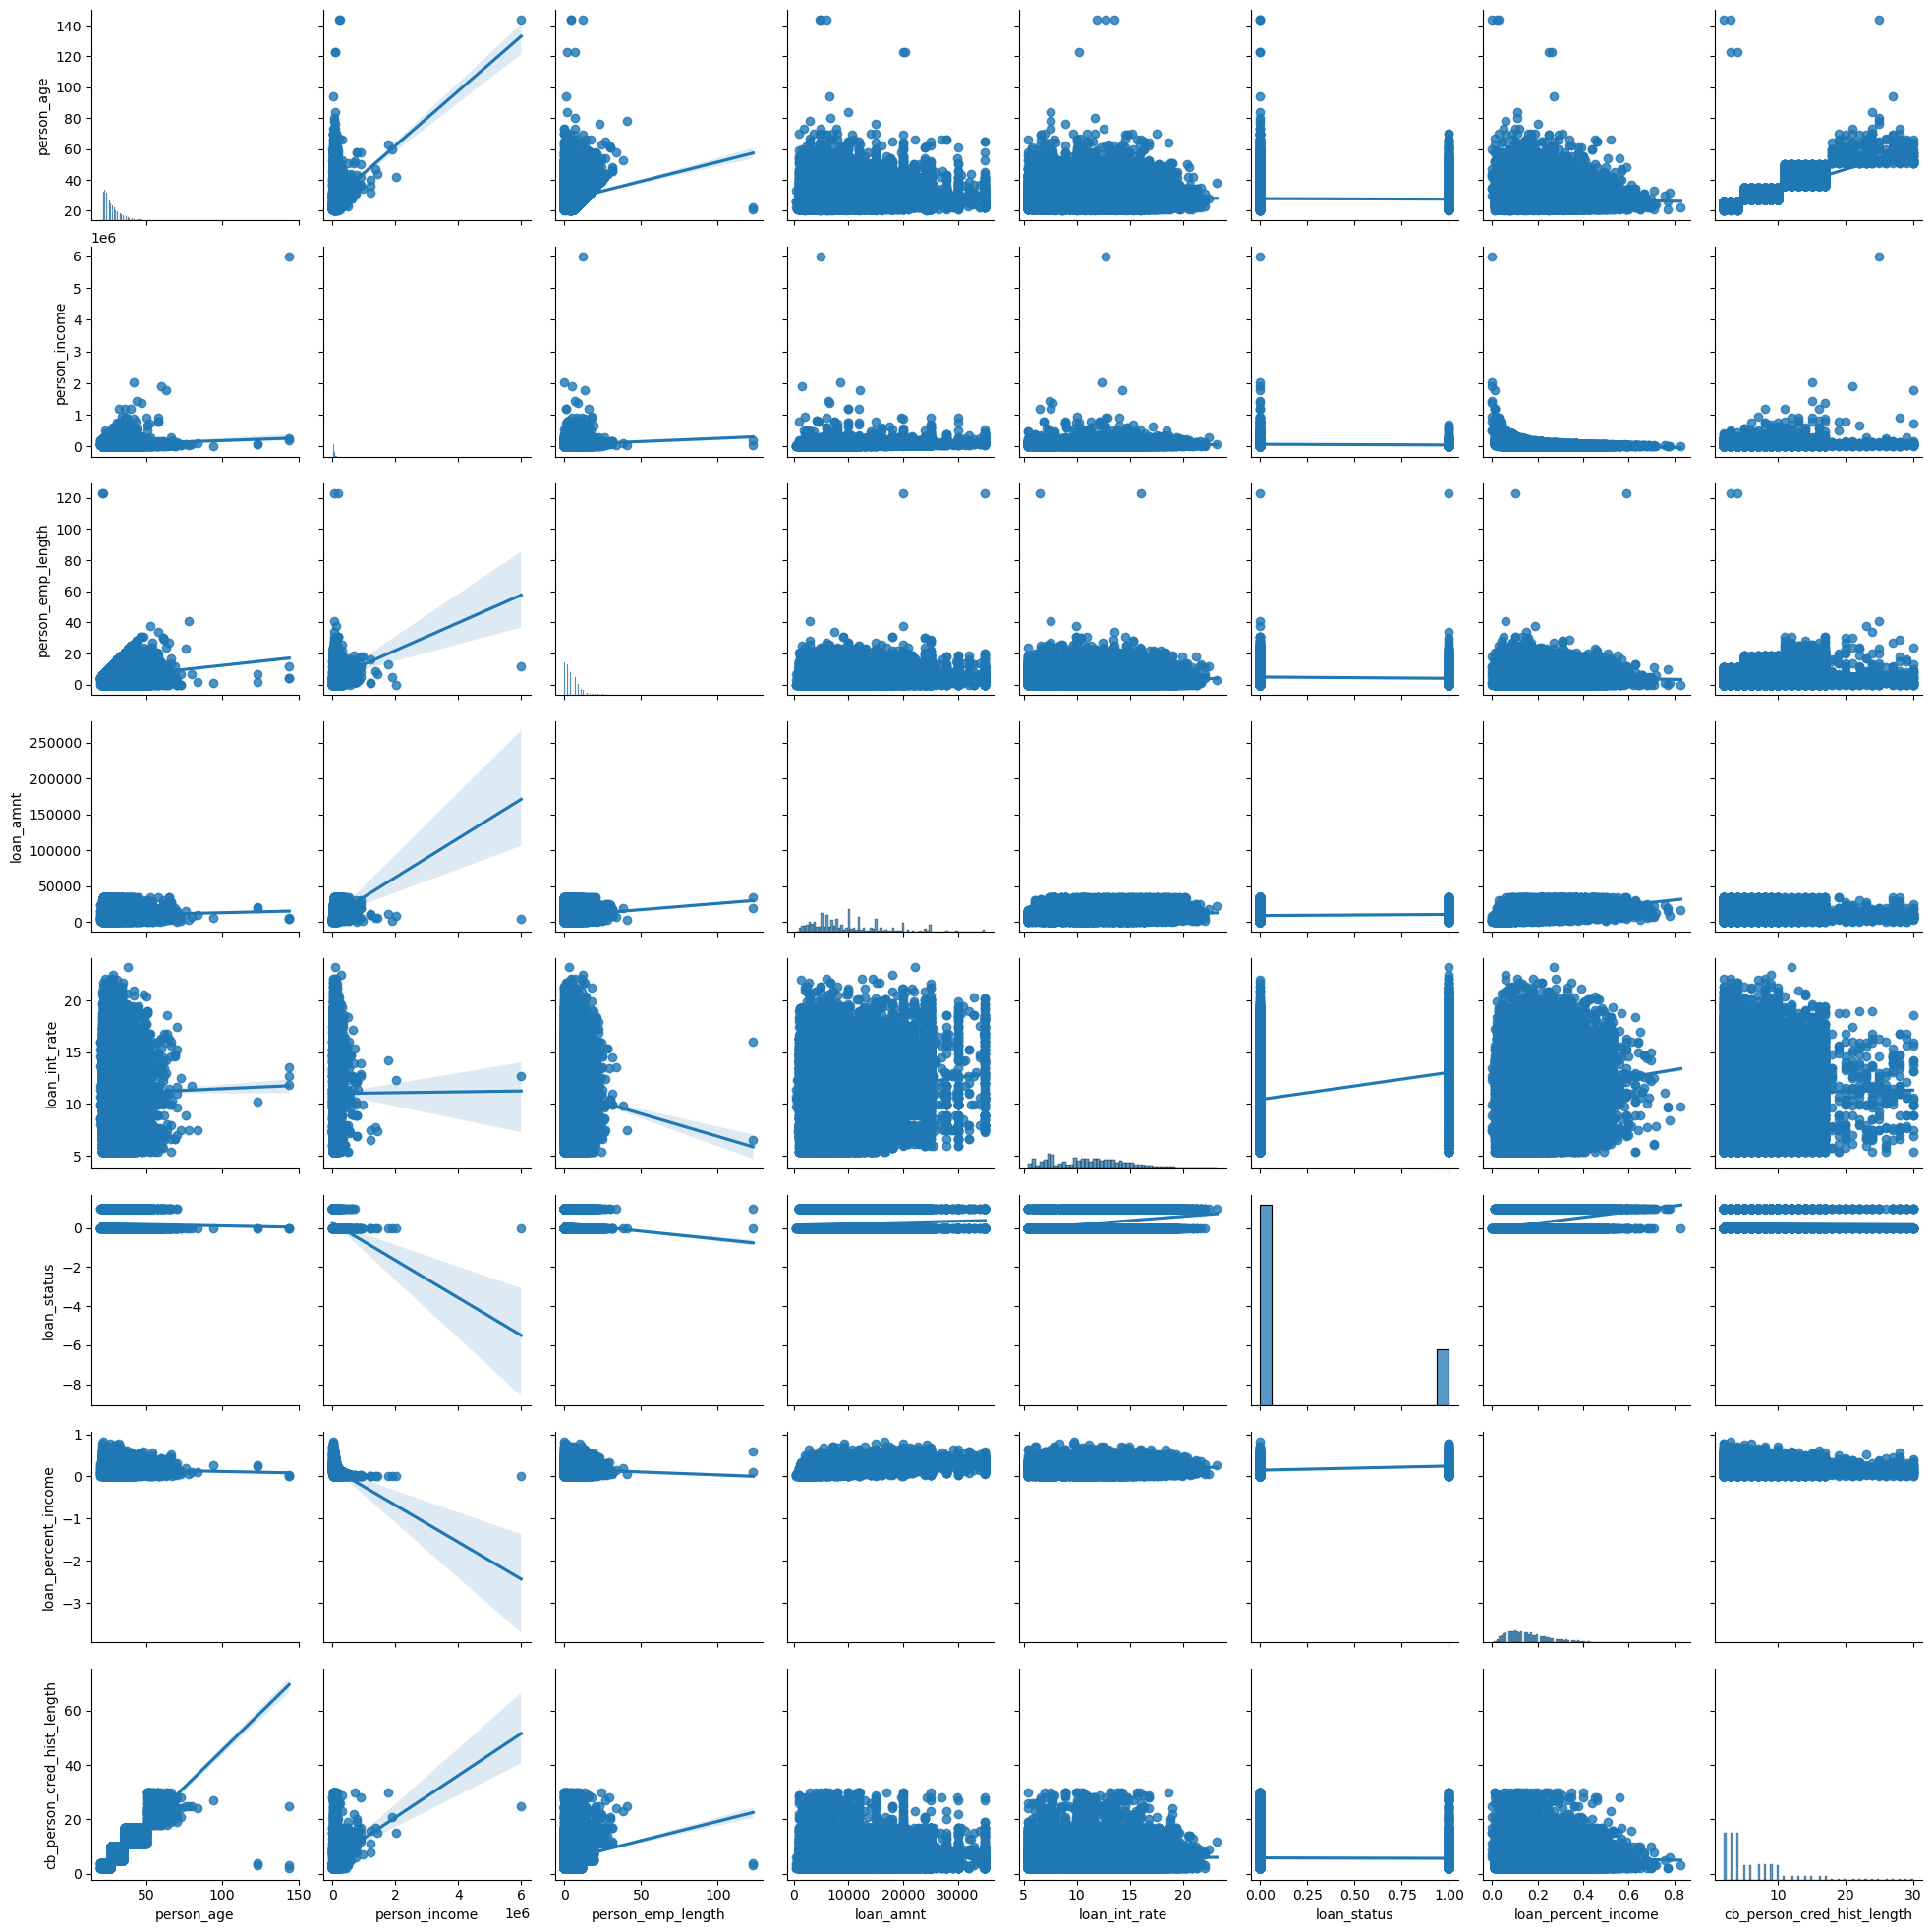

In [14]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");  #I looked at the reg

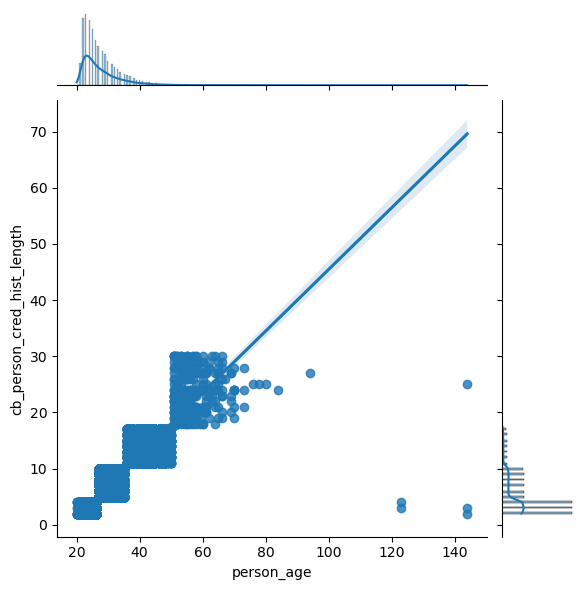

In [113]:
sns.jointplot(x = "person_age", y = "cb_person_cred_hist_length", data = df, kind = "reg");  #I focused on these because they have high corr.

In [10]:
import statsmodels.api as sm

In [17]:
X = df[["person_age"]]       #Age of the persons
X[0:5]
X = sm.add_constant(X)   #I look at the stats model
X[0:5]

,const,person_age
0,1.0,22
1,1.0,21
2,1.0,25
3,1.0,23
4,1.0,24


In [21]:
y = df["cb_person_cred_hist_length"]
y[0:5]

0    3
1    2
2    3
3    2
4    4
Name: cb_person_cred_hist_length, dtype: int64

In [25]:
lm = sm.OLS(y,X)

In [33]:
model = lm.fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     cb_person_cred_hist_length   R-squared:                       0.738
Model:                                    OLS   Adj. R-squared:                  0.738
Method:                         Least Squares   F-statistic:                 9.182e+04
Date:                        Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                                17:47:00   Log-Likelihood:                -70015.
No. Observations:                       32581   AIC:                         1.400e+05
Df Residuals:                           32579   BIC:                         1.401e+05
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4164      0.052   -182.740      0.000      -9.517      -9.315
person_age     0.5488      0.002    303.019      0.000       0.545       0.552
==============================================================================
Omnibus:                    27676.976   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14579207.625
Skew:                          -3.045   Prob(JB):                         0.00
Kurtosis:                     106.452   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
import statsmodels.formula.api as smf
lm = smf.ols("person_age ~ cb_person_cred_hist_length", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             person_age   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                 9.182e+04
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:01:47   Log-Likelihood:                -84618.
No. Observations:               32581   AIC:                         1.692e+05
Df Residuals:                   32579   BIC:                         1.693e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     19.9281      0.031    634.117      0.000      19.867      19.990
cb_person_cred_hist_length     1.3450      0.004    303.019      0.000       1.336       1.354
==============================================================================
Omnibus:                    41392.986   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48773701.173
Skew:                           6.280   Prob(JB):                         0.00
Kurtosis:                     192.130   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model.params

Intercept                     19.928125
cb_person_cred_hist_length     1.344968
dtype: float64

In [55]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,19.9281,0.031,634.117,0.000,19.867,19.990
cb_person_cred_hist_length,1.3450,0.004,303.019,0.000,1.336,1.354


In [58]:
model.conf_int()

,0,1
Intercept,19.866527,19.989722
cb_person_cred_hist_length,1.336268,1.353667


In [61]:
model.f_pvalue

0.0

In [64]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [67]:
model.rsquared_adj

0.738101797130664

In [74]:
from sklearn.linear_model import LinearRegression

In [76]:
X = df[["person_age"]]
y = df["cb_person_cred_hist_length"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([0.5487938])

In [79]:
model.score(X,y)

0.7381098357495368

In [82]:
model.predict(X)[0:10]

array([2.65709816, 2.10830436, 4.30347956, 3.20589196, 3.75468576,
       2.10830436, 4.85227336, 3.75468576, 3.75468576, 2.10830436])